In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Просмотр и подготовка данных

In [ ]:
df=pd.read_csv("Global_Music_Streaming_Listener_Preferences.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

In [ ]:
df.head()

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


In [ ]:
df.isnull().sum()

,0
User_ID,0
Age,0
Country,0
Streaming Platform,0
Top Genre,0
Minutes Streamed Per Day,0
Number of Songs Liked,0
Most Played Artist,0
Subscription Type,0
Listening Time (Morning/Afternoon/Night),0


In [ ]:
df.nunique()

,0
User_ID,5000
Age,48
Country,10
Streaming Platform,6
Top Genre,10
Minutes Streamed Per Day,591
Number of Songs Liked,500
Most Played Artist,10
Subscription Type,2
Listening Time (Morning/Afternoon/Night),3


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,36.664000,13.763844,13.00,25.0000,37.00,49.0000,60.00
Minutes Streamed Per Day,5000.0,309.237200,172.029822,10.00,161.0000,316.00,457.2500,600.00
Number of Songs Liked,5000.0,253.517200,146.369280,1.00,126.0000,254.00,382.0000,500.00
Discover Weekly Engagement (%),5000.0,50.296464,23.171936,10.02,30.1475,50.42,70.3375,89.99
Repeat Song Rate (%),5000.0,42.391060,21.444121,5.00,24.1950,41.96,60.7400,79.99


в df отсутствуют незаполненные ячейки

# Визуализация

**Идеи анализа: сначала посмотрим общую статистику: распределение по странам, по возрастам, платформам, топ популярных жанров, артистов**

In [ ]:
sns.set(style="whitegrid")

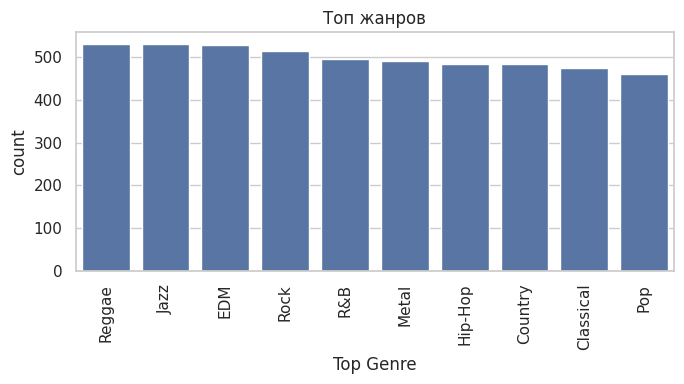

In [ ]:
# уникальных значений 10
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Top Genre', order=df['Top Genre'].value_counts().index)
plt.title('Топ жанров')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

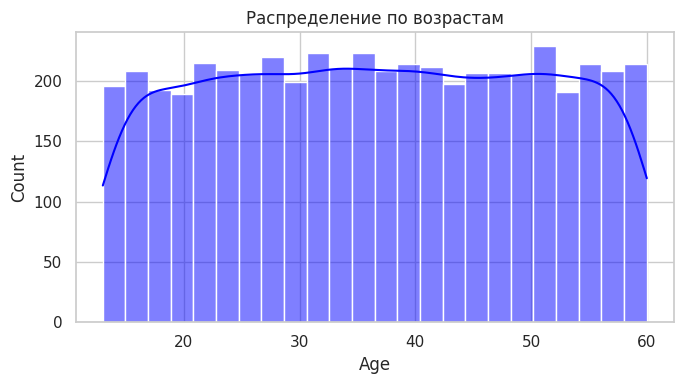

In [ ]:
# уникальных значений 48
plt.figure(figsize=(7, 4))
sns.histplot(df['Age'], bins=24, kde=True, color='blue')
plt.title('Распределение по возрастам')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

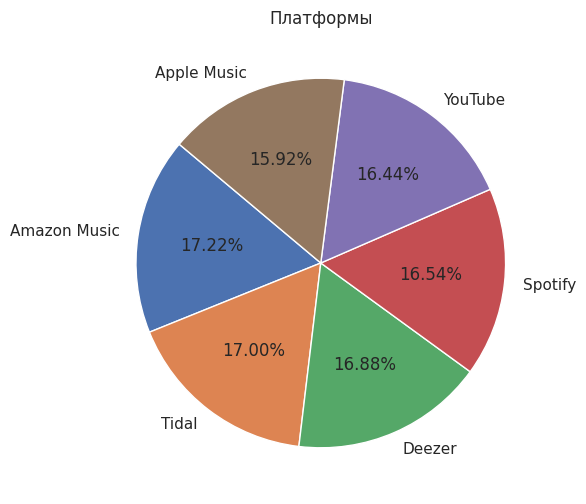

In [ ]:
# уникальных значений 6
platform_counts = df['Streaming Platform'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Платформы')
plt.show()

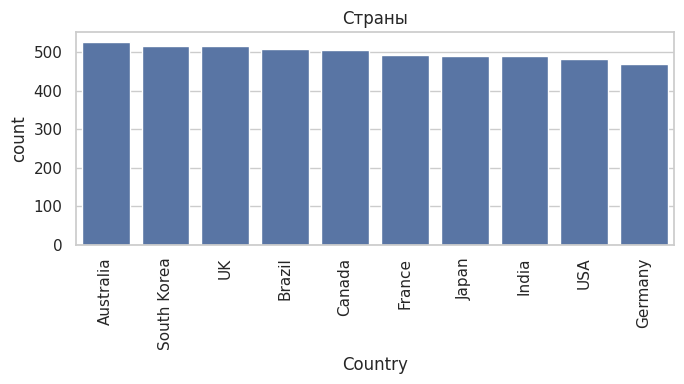

In [ ]:
# уникальных значений 10
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.title('Страны')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

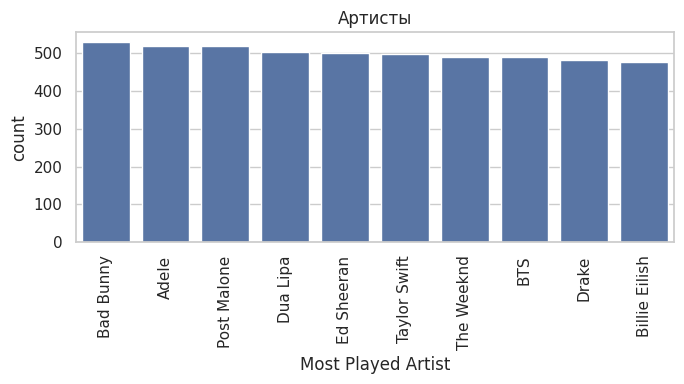

In [ ]:
# уникальных значений 10
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Most Played Artist', order=df['Most Played Artist'].value_counts().index)
plt.title('Артисты')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

ничего интересного не выявлено: равномерное распределение по всем показателям (скорее всего из за того, что уже представлены самые популярные значения)

**Далее посмотрим подробнее на зависимость от разных показателей:**

**1. по стране:**  

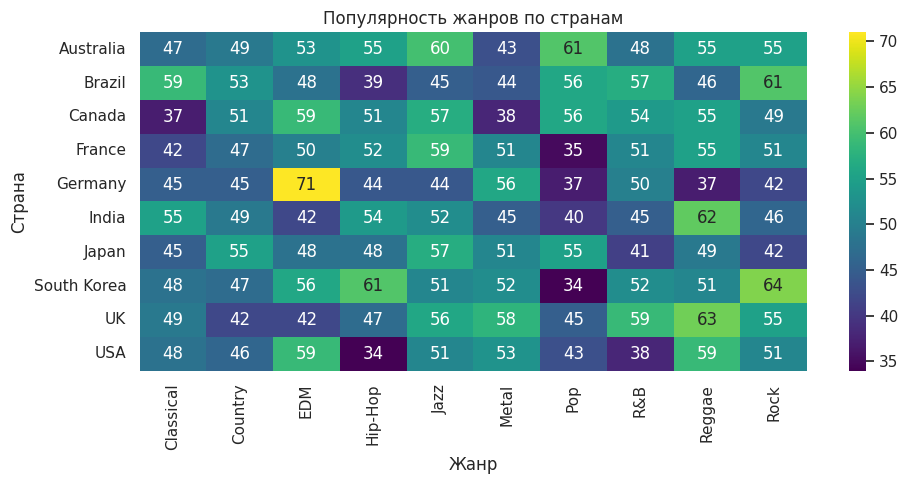

In [ ]:
top_genres_by_country = df.groupby(['Country', 'Top Genre']).size().reset_index(name='count')
top_genres_pivot = top_genres_by_country.pivot(index='Country', columns='Top Genre', values='count')

plt.figure(figsize=(10, 5))
sns.heatmap(top_genres_pivot, cmap='viridis', annot=True, fmt='g')
plt.title('Популярность жанров по странам')
plt.xlabel('Жанр')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()

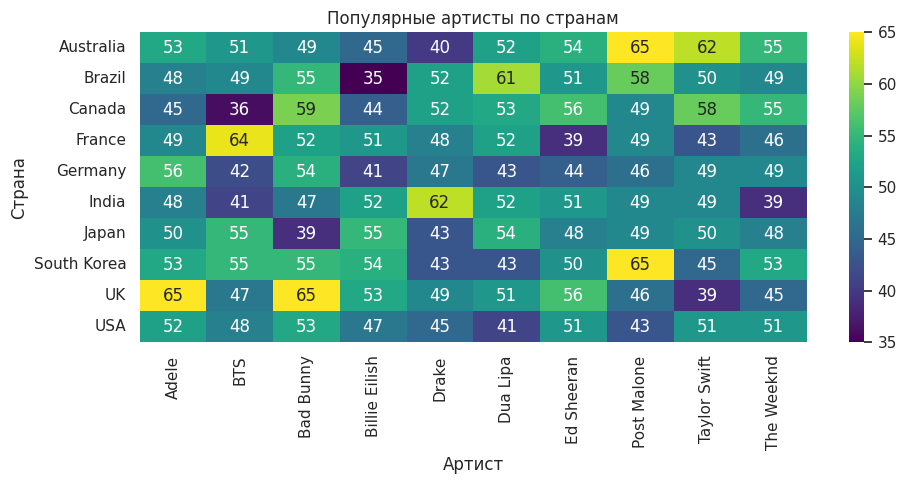

In [ ]:
artists_by_country = df.groupby(['Country', 'Most Played Artist']).size().reset_index(name='count')
artists_pivot = artists_by_country.pivot(index='Country', columns='Most Played Artist', values='count')

plt.figure(figsize=(10, 5))
sns.heatmap(artists_pivot, cmap='viridis', annot=True, fmt='g')
plt.title('Популярные артисты по странам')
plt.xlabel('Артист')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()


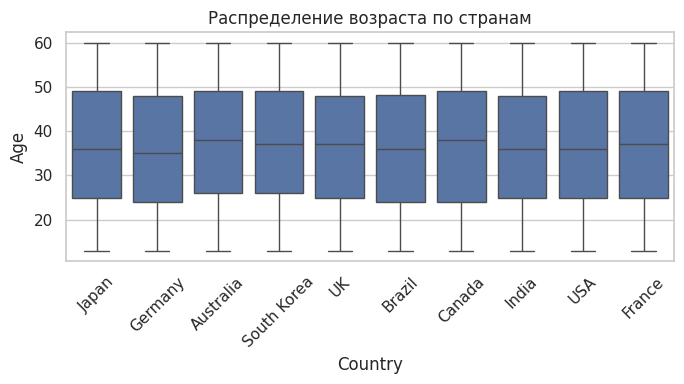

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Country', y='Age')
plt.title('Распределение возраста по странам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

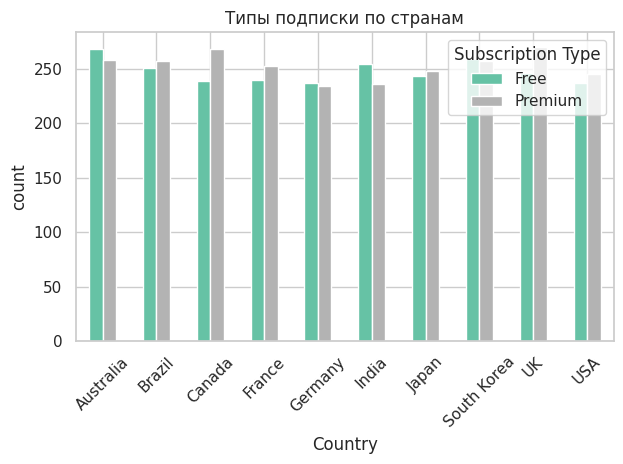

In [ ]:
subscription_by_country = df.groupby(['Country', 'Subscription Type']).size().reset_index(name='count')
subscription_pivot = subscription_by_country.pivot(index='Country', columns='Subscription Type', values='count')

subscription_pivot.plot(kind='bar', colormap='Set2')
plt.title('Типы подписки по странам')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

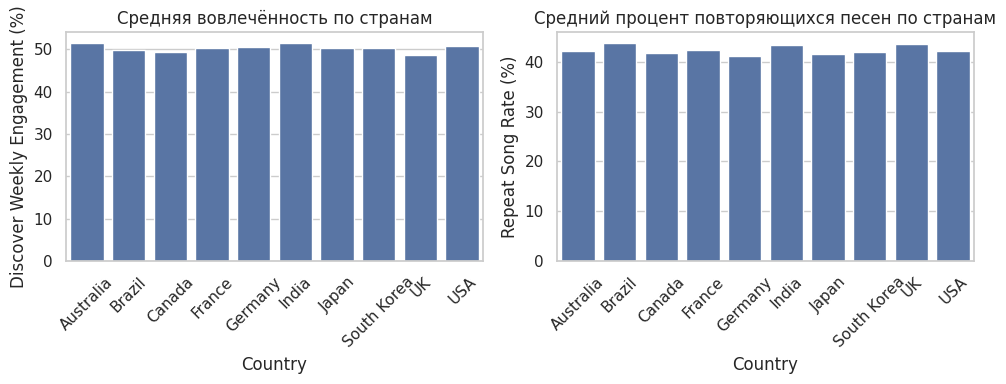

In [ ]:
engagement_by_country = df.groupby('Country')[['Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(data=engagement_by_country, x='Country', y='Discover Weekly Engagement (%)', ax=ax[0])
ax[0].set_title('Средняя вовлечённость по странам')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(data=engagement_by_country, x='Country', y='Repeat Song Rate (%)', ax=ax[1])
ax[1].set_title('Средний процент повторяющихся песен по странам')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**2. по возрасту:**


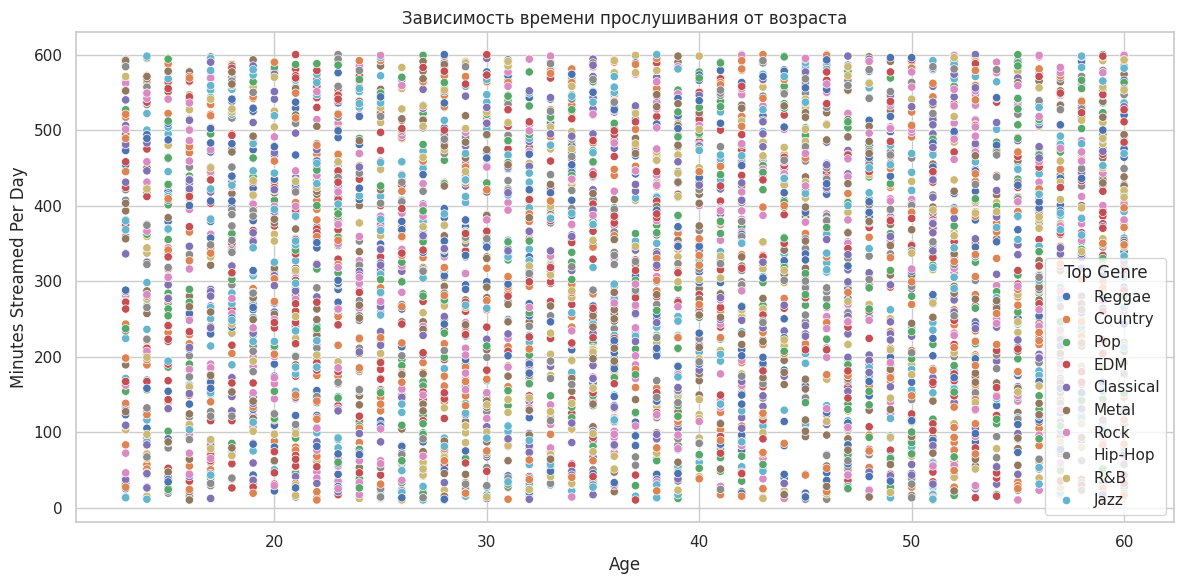

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Minutes Streamed Per Day', hue='Top Genre')
plt.title('Зависимость времени прослушивания от возраста')
plt.tight_layout()
plt.show()

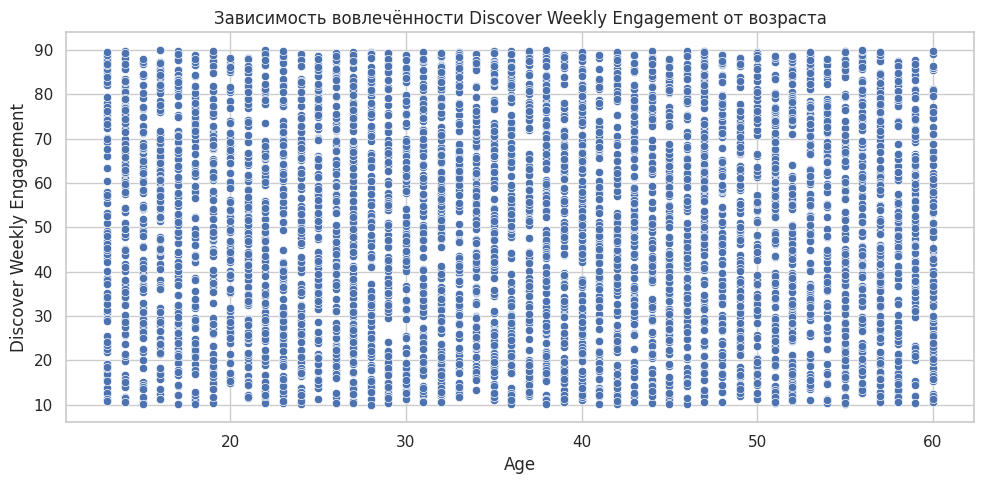

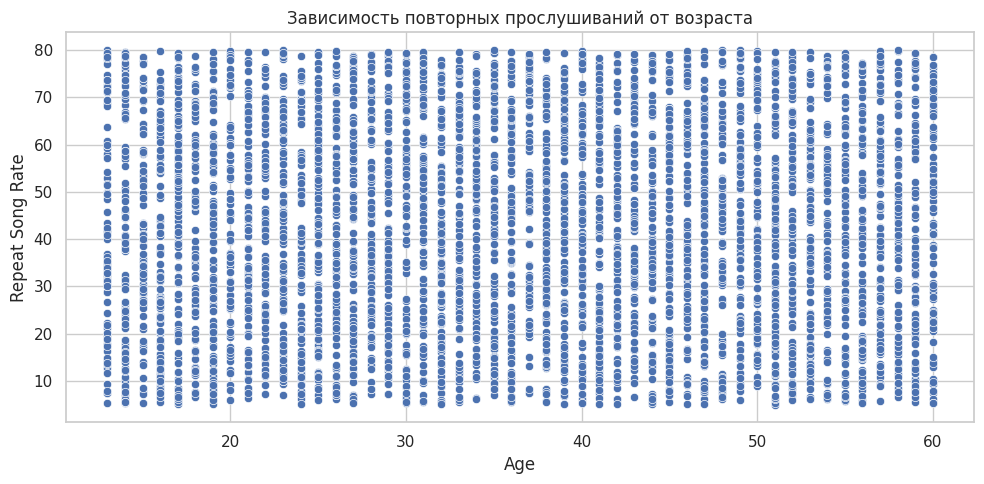

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Discover Weekly Engagement (%)')
plt.title('Зависимость вовлечённости Discover Weekly Engagement от возраста')
plt.xlabel('Age')
plt.ylabel('Discover Weekly Engagement')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Repeat Song Rate (%)')
plt.title('Зависимость повторных прослушиваний от возраста')
plt.xlabel('Age')
plt.ylabel('Repeat Song Rate')
plt.tight_layout()
plt.show()

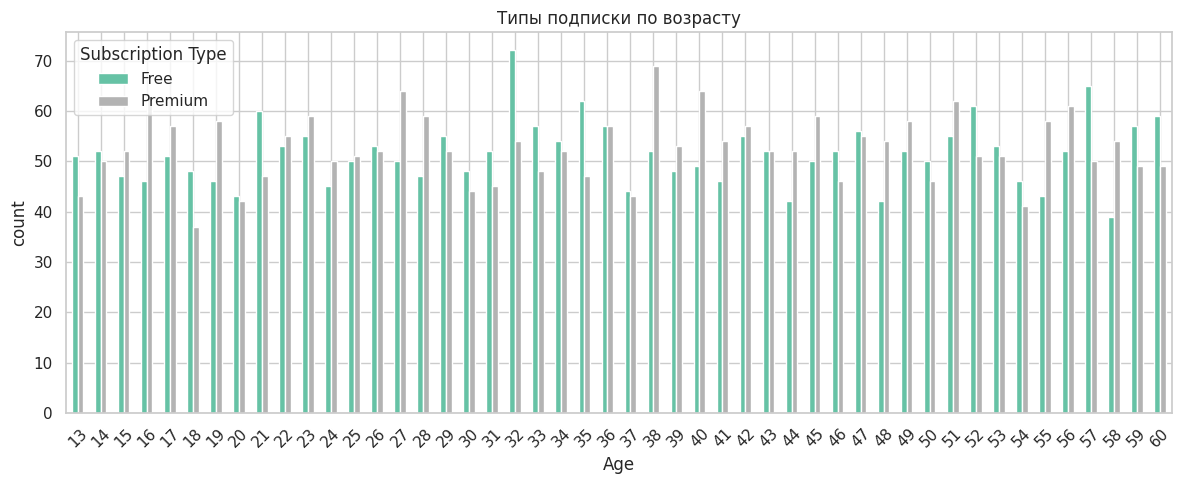

In [ ]:
subscription_by_Age = df.groupby(['Age', 'Subscription Type']).size().reset_index(name='count')
subscription_pivot = subscription_by_Age.pivot(index='Age', columns='Subscription Type', values='count')

subscription_pivot.plot(kind='bar', colormap='Set2', figsize=(12, 5))
plt.title('Типы подписки по возрасту')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3. по подписке:**

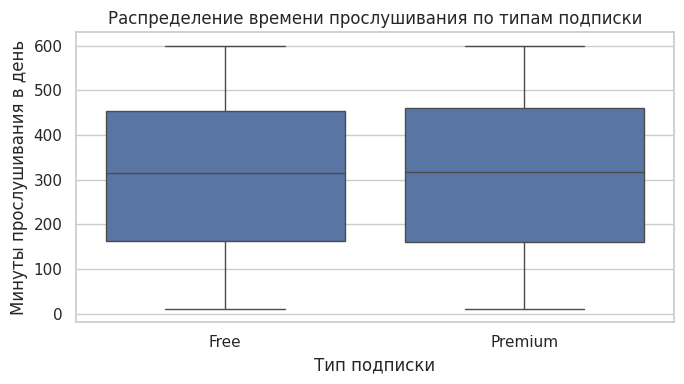

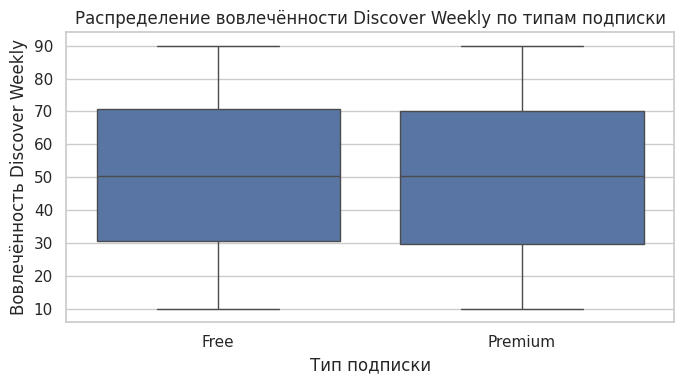

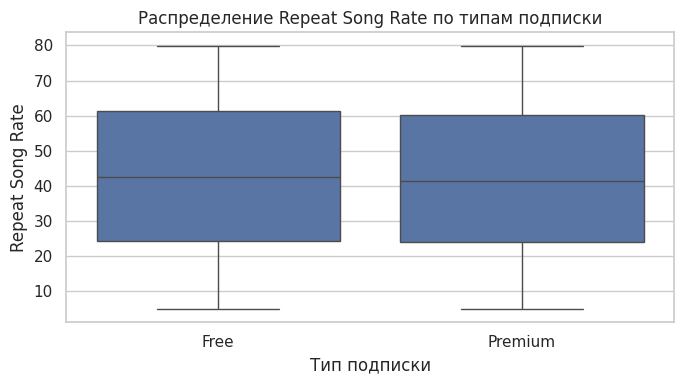

In [ ]:
# Влияние типа подписки на время прослушивания
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Subscription Type', y='Minutes Streamed Per Day')
plt.title('Распределение времени прослушивания по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Минуты прослушивания в день')
plt.tight_layout()
plt.show()

# Влияние типа подписки на вовлечённость Discover Weekly
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Subscription Type', y='Discover Weekly Engagement (%)')
plt.title('Распределение вовлечённости Discover Weekly по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Вовлечённость Discover Weekly')
plt.tight_layout()
plt.show()

# Влияние типа подписки на Repeat Song Rate
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Subscription Type', y='Repeat Song Rate (%)')
plt.title('Распределение Repeat Song Rate по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Repeat Song Rate')
plt.tight_layout()
plt.show()

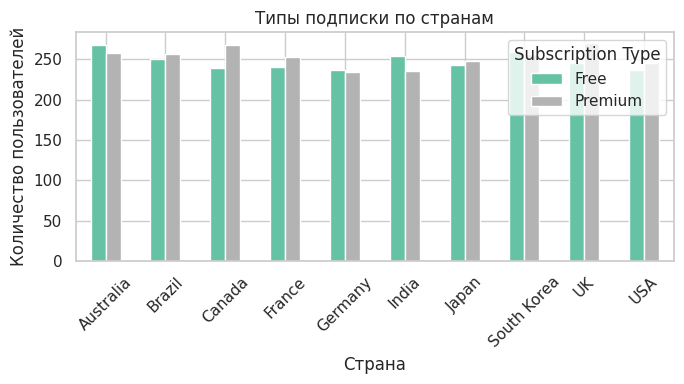

In [ ]:
subscription_by_country = df.groupby(['Country', 'Subscription Type']).size().reset_index(name='count')
subscription_pivot = subscription_by_country.pivot(index='Country', columns='Subscription Type', values='count').fillna(0)

subscription_pivot.plot(kind='bar', colormap='Set2', figsize=(7, 4))
plt.title('Типы подписки по странам')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Корреляция**

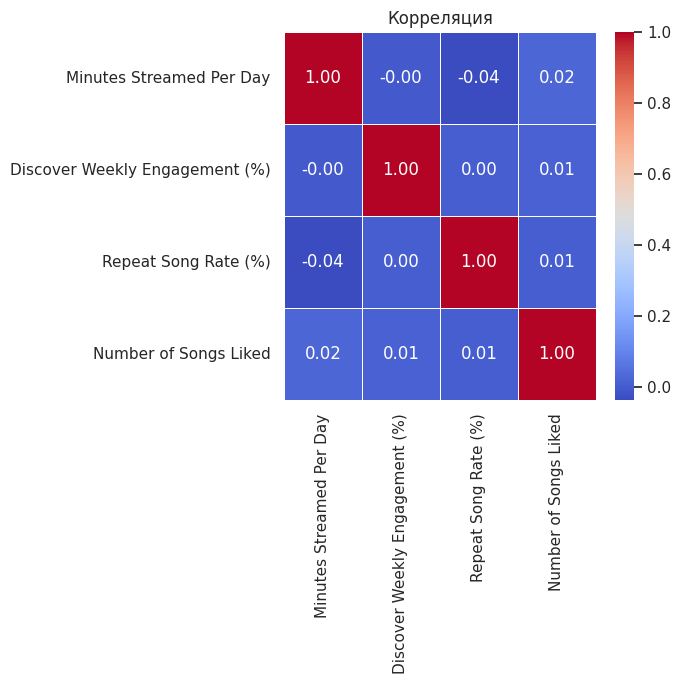

In [ ]:
# Корреляционная матрица
corr = df[['Minutes Streamed Per Day', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)', 'Number of Songs Liked']].corr()

# Тепловая карта корреляции
plt.figure(figsize=(7, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляция')
plt.tight_layout()
plt.show()